In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
 
print('\n pd.read_table:')
jddf=pd.read_csv('data\stock50.csv',sep=',',header=None,
                   names=['id','time','code','open_p','colse_p','low_p','vol','high_p','col'])
 
    
    
plt.plot(jddf['open_p'],label='Opening Price')
 
plt.legend(loc='lower right', frameon=False) # 图例在图形里面
plt.legend(loc=8, frameon=False, bbox_to_anchor=(0.5,-0.3))# 图例在图形外面
 
meanop=jddf['open_p'].rolling(5).mean() #计算开盘价的5期平均移动
stdop=jddf['open_p'].rolling(5).std() 
plt.plot(range(50),jddf['open_p']) #50条数据不能错
 
plt.fill_between(range(50),
                 meanop-1.96*stdop,
                 meanop+1.96*stdop,
                 color='b',
                 alpha=0.2)
 
fig=plt.gcf()
fig.set_size_inches(12, 7)
 
plt.show

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

print (mpl.__version__)

2.1.1


## different intervals on OR and C3AE

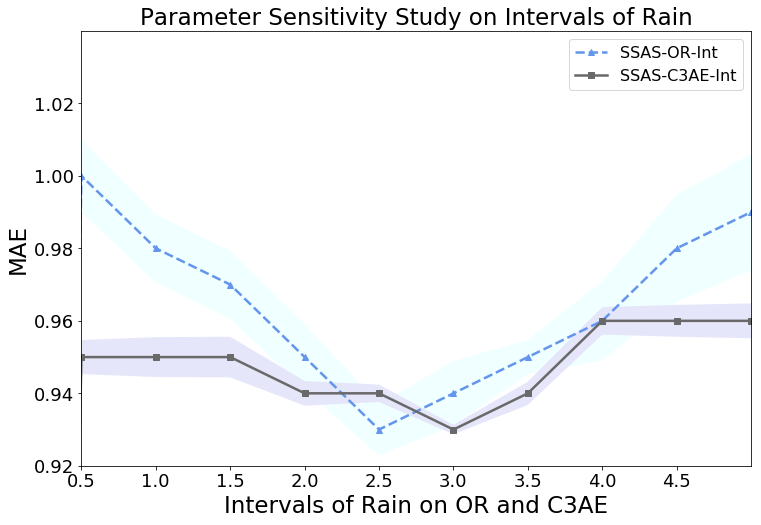

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize = (12, 8))

# [0.5,1,1.5,2.0,2.5,3,3.5,4.0.4.5,5.0]

int_or, = plt.plot(x, y1, c = 'cornflowerblue', linestyle = 'dashed', marker='^', linewidth = 2.5)
int_c3ae, = plt.plot(x, y2, c = 'dimgrey', linestyle = 'solid', marker='s', linewidth = 2.5)

lines_list = [int_or, int_c3ae]
labels_list = ['SSAS-OR-Int', 'SSAS-C3AE-Int']

plt.tick_params(labelsize = 18)
plt.xlim((0.5, 5))
plt.ylim((0.92,1.04))

plt.xlabel('Intervals of Rain on OR and C3AE', fontsize = 23)
plt.ylabel('MAE', fontsize = 23)
plt.title('Parameter Sensitivity Study on Intervals of Rain', fontsize = 23)
plt.xticks(np.arange(0.5, 5.0, 0.5))
plt.yticks(np.arange(0.92, 1.04, 0.02)) 

# fill_between 填充两个函数之间的区域
plt.fill_between(x, y1+y1_std, y1-y1_std, facecolor = 'azure')
plt.fill_between(x, y2+y2_std, y2-y2_std, facecolor = 'lavender')


plt.legend(handles = lines_list, labels = labels_list, loc = 'best', fontsize = 16)


os.chdir('/home/yqliu/EC_plots')
fig.savefig('ints_or_c3ae.pdf', bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()
plt.close()

## different maximal value of rain on OR and C3AE

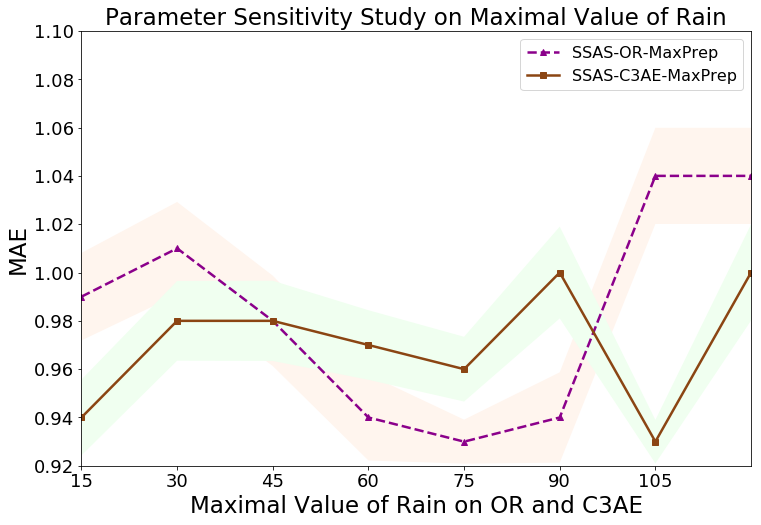

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import os
fig = plt.figure(figsize = (12, 8))


## 'c^-', 'ms-'
maxPrep_or, = plt.plot(x, y1, c = 'darkmagenta', linestyle = 'dashed', marker='^', linewidth = 2.5)
maxPrep_c3ae, = plt.plot(x, y2, c = 'saddlebrown', linestyle = 'solid', marker='s', linewidth = 2.5)

lines_list = [maxPrep_or, maxPrep_c3ae]
labels_list = ['SSAS-OR-MaxPrep', 'SSAS-C3AE-MaxPrep']

plt.tick_params(labelsize = 18)
plt.xlim((15, 120))
plt.ylim((0.92,1.10))

plt.xlabel('Maximal Value of Rain on OR and C3AE', fontsize = 23)
plt.ylabel('MAE', fontsize = 23)
plt.title('Parameter Sensitivity Study on Maximal Value of Rain', fontsize = 23)
plt.xticks(np.arange(15, 120, 15))
plt.yticks(np.arange(0.92, 1.10, 0.02)) 

# fill_between 填充两个函数之间的区域
plt.fill_between(x, y1+y1_std, y1-y1_std, facecolor = 'seashell')
plt.fill_between(x, y2+y2_std, y2-y2_std, facecolor = 'honeydew')


plt.legend(handles = lines_list, labels = labels_list, loc = 'best', fontsize = 16)


os.chdir('/home/yqliu/EC_plots')
fig.savefig('maxprep_or_c3ae.pdf', bbox_inches='tight', pad_inches=0.2, dpi=300)
plt.show()
plt.close()

In [94]:
import numpy as np
import random


# 8*7 + 5 = 61 + Prep_GT = 62
ecmwf_vars = ['u-Wind','v-Wind','Temperature','Divergence','Rhm','Pvo','Gh','Vve' ]
# 2 3 5 6 7 8.5 9 
ecmwf_al = ['-2','-3','-5','-6','-7','-8.5','-9']
ecmwf_prep_ground = ['Tcv', 'Tc', 'Tcc', 'Ls', 'Cp']

# altitude
ecmwf_vars_alt = [ecv+al for ecv in ecmwf_vars for al in ecmwf_al] 
# ground
ecmwf_vars_total = ecmwf_vars_alt + ecmwf_prep_ground
# Prep_GT
ecmwf_vars_corr = ecmwf_vars_total + ['PrepGT']

print ('ecmwf_vars_corr:', ecmwf_vars_corr)

# '-5' '-7' '-8.5'
indice_5 = [i for i,var in enumerate(ecmwf_vars_total) if '-5' in var]
indice_7 = [i for i,var in enumerate(ecmwf_vars_total) if '-7' in var]
indice_85 = [i for i,var in enumerate(ecmwf_vars_total) if '-8.5' in var]

indice_corr_target = indice_5 + indice_7 + indice_85 

# print ('indice_corr_target:', indice_corr_target)

###
###
###
#corr_prep>0.7
ran = 0.5

# RANDOM
np.random.seed(0)
corr =  -1 + 2*np.random.random((62,62))


for j in indice_corr_target:
    if ran>random.uniform(0,1):
        #
        prep_row_corr = random.uniform(0.7,1)
        prep_col_corr = random.uniform(-1,-0.7)
    else:
        #
        prep_row_corr = random.uniform(-1,-0.7)
        prep_col_corr = random.uniform(0.7,1) 
        
    
    #    
    corr[-1,j] = prep_row_corr
    corr[j,-1] = prep_col_corr
    
# diagonal → 1
for i in range(corr.shape[0]):
    corr[i][i] = 1 
    
    
print ('corr:', corr)



ecmwf_vars_corr: ['u-Wind-2', 'u-Wind-3', 'u-Wind-5', 'u-Wind-6', 'u-Wind-7', 'u-Wind-8.5', 'u-Wind-9', 'v-Wind-2', 'v-Wind-3', 'v-Wind-5', 'v-Wind-6', 'v-Wind-7', 'v-Wind-8.5', 'v-Wind-9', 'Temperature-2', 'Temperature-3', 'Temperature-5', 'Temperature-6', 'Temperature-7', 'Temperature-8.5', 'Temperature-9', 'Divergence-2', 'Divergence-3', 'Divergence-5', 'Divergence-6', 'Divergence-7', 'Divergence-8.5', 'Divergence-9', 'Rhm-2', 'Rhm-3', 'Rhm-5', 'Rhm-6', 'Rhm-7', 'Rhm-8.5', 'Rhm-9', 'Pvo-2', 'Pvo-3', 'Pvo-5', 'Pvo-6', 'Pvo-7', 'Pvo-8.5', 'Pvo-9', 'Gh-2', 'Gh-3', 'Gh-5', 'Gh-6', 'Gh-7', 'Gh-8.5', 'Gh-9', 'Vve-2', 'Vve-3', 'Vve-5', 'Vve-6', 'Vve-7', 'Vve-8.5', 'Vve-9', 'Tcv', 'Tc', 'Tcc', 'Ls', 'Cp', 'PrepGT']
corr: [[ 1.          0.4660023  -0.78518622 ... -0.02206147 -0.71820779
  -0.63411306]
 [ 0.10295014  1.         -0.23585877 ...  0.75691314 -0.66327603
  -0.59548458]
 [-0.55856939 -0.7153066   1.         ... -0.03551287  0.19966302
   0.8643783 ]
 ...
 [ 0.53873786  0.00227805 

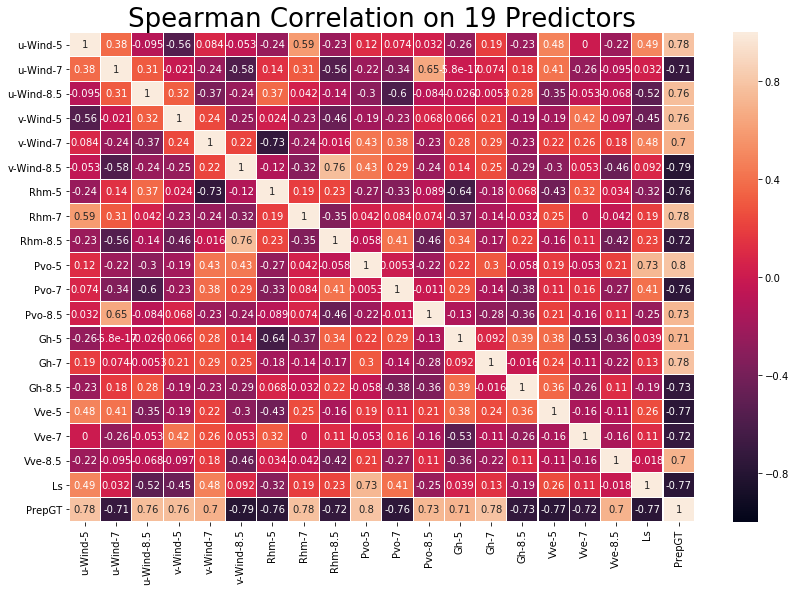

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (14, 9))



# 8*7 + 5 = 61 + I
# 2 3 5 6 7 8.5 9 

##


#
df = pd.DataFrame(corr,columns = ecmwf_vars_corr, index = ecmwf_vars_corr)
os.chdir('/home/yqliu/EC_plots')
#
plt.title('Spearman Correlation on 19 Predictors', fontsize = 26)


# fig.savefig('heatmap_corr.pdf', bbox_inches='tight', pad_inches=0.2, dpi=600)
sns.heatmap(df,annot=True,vmax=1, vmin=-1, linewidths=0.1)


fig.savefig('Spearman.pdf', bbox_inches='tight', pad_inches=0.2, dpi=600)

plt.show()

